In [6]:
import pandas as pd
import plotly.graph_objs as go

In [18]:
# read in the data

df = pd.read_csv('../assets/usa-2020-agriculture.csv')
df.shape

(50, 12)

In [19]:
# each row is a state
df.head()

,state,state code,animal products,beef,pork,hides,other livestock,dairy,broilers,other poultry,plant products,veggies fresh
0,Alabama,AL,554.280628,47.160898,8.777222,4.083623,84.439534,1.280302,340.284525,68.254524,821.823694,0.000000
1,Alaska,AK,2.883829,0.530178,0.127906,0.046629,2.141432,0.037684,0.000000,0.000000,14.243116,0.000000
2,Arizona,AZ,256.312593,81.479841,14.268717,7.033165,22.641092,125.573542,0.000000,5.316236,1058.220533,155.465890
3,Arkansas,AR,651.875333,51.598943,17.084652,4.652565,51.534754,1.764628,378.558233,146.681557,2909.749835,0.000000
4,California,CA,2078.763165,331.417767,7.260454,27.354003,339.103010,1187.222273,99.301696,87.103963,20253.333440,1137.101964


In [20]:
# missing data?
df.isnull().sum()

state              0
state code         0
animal products    0
beef               0
pork               0
hides              0
other livestock    0
dairy              0
broilers           0
other poultry      0
plant products     0
veggies fresh      0
dtype: int64

In [22]:
# make a list of columns
list_of_columns=list(df.columns)
list_of_columns.remove('state')
list_of_columns.remove('state code')
list_of_columns

['animal products',
 'beef',
 'pork',
 'hides',
 'other livestock',
 'dairy',
 'broilers',
 'other poultry',
 'plant products',
 'veggies fresh']

In [23]:
# data objects
go.Bar
go.Scatter
go.Pie
go.Choropleth

# figure objects
go.Format
go.Figure


AttributeError: module 'plotly.graph_objs' has no attribute 'Format'

In [25]:
data=go.Choropleth(
    locations=df['state code'], # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in `locations`
    z = df['pork'], # Data to be color-coded
    colorscale = ['lightgrey','blue'],
    colorbar_title = 'some title',
)
data

Choropleth({
    'colorbar': {'title': {'text': 'some title'}},
    'colorscale': [[0.0, 'lightgrey'], [1.0, 'blue']],
    'locationmode': 'USA-states',
    'locations': array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID',
                        'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS',
                        'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
                        'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
                        'WI', 'WY'], dtype=object),
    'z': array([8.77722161e+00, 1.27905622e-01, 1.42687167e+01, 1.70846515e+01,
                7.26045401e+00, 4.58493387e+01, 2.28460355e-01, 2.17841775e+00,
                8.06448966e-01, 1.05538227e+01, 5.40180030e-01, 8.16102220e+00,
                5.48654783e+02, 4.15439872e+02, 2.56578073e+03, 1.77765887e+02,
                5.16722622e+01, 3.88543492e-01, 2.90402071e-01, 2.54926361e+00,
           

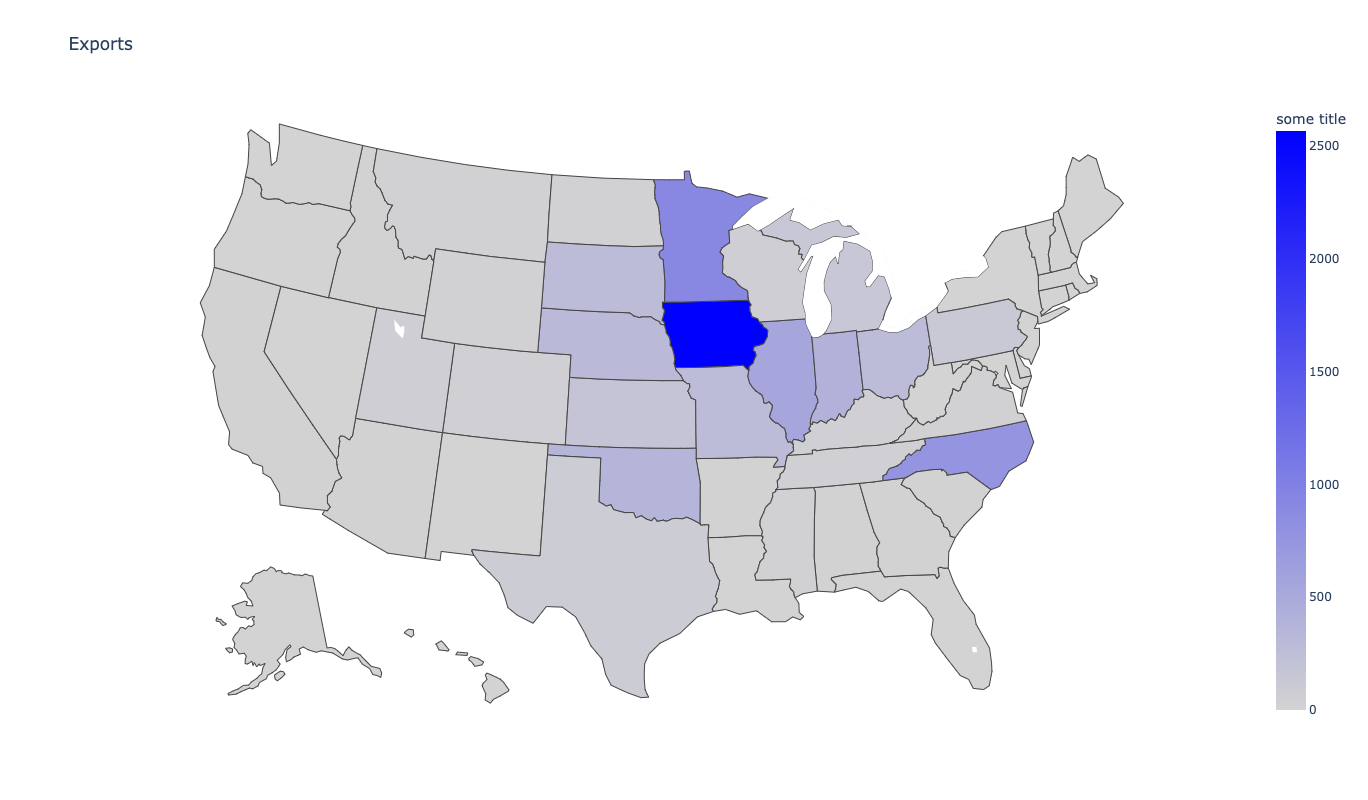

In [27]:
fig = go.Figure([data])
fig.update_layout(
        title_text = 'Exports',
        geo_scope='usa',
        width=1200,
        height=800
    )
fig.write_html('iowa-pork.html')
fig

In [32]:
# make a function that can intake any varname and produce a map.
def make_figure(varname):
    myheading1 = f"Wow! That's a lot of {varname}!"
    mygraphtitle = f'2020 {varname} exports, by state'
    mycolorscale = 'ylorrd' # Note: The error message will list possible color scales.
    mycolorbartitle = "Millions USD"

    data=go.Choropleth(
        locations=df['state code'], # Spatial coordinates
        locationmode = 'USA-states', # set of locations match entries in `locations`
        z = df[varname].astype(float), # Data to be color-coded
        colorscale = mycolorscale,
        colorbar_title = mycolorbartitle,
    )


    fig = go.Figure(data)
    fig.update_layout(
        title_text = mygraphtitle,
        geo_scope='usa',
        width=1200,
        height=800
    )
    return fig

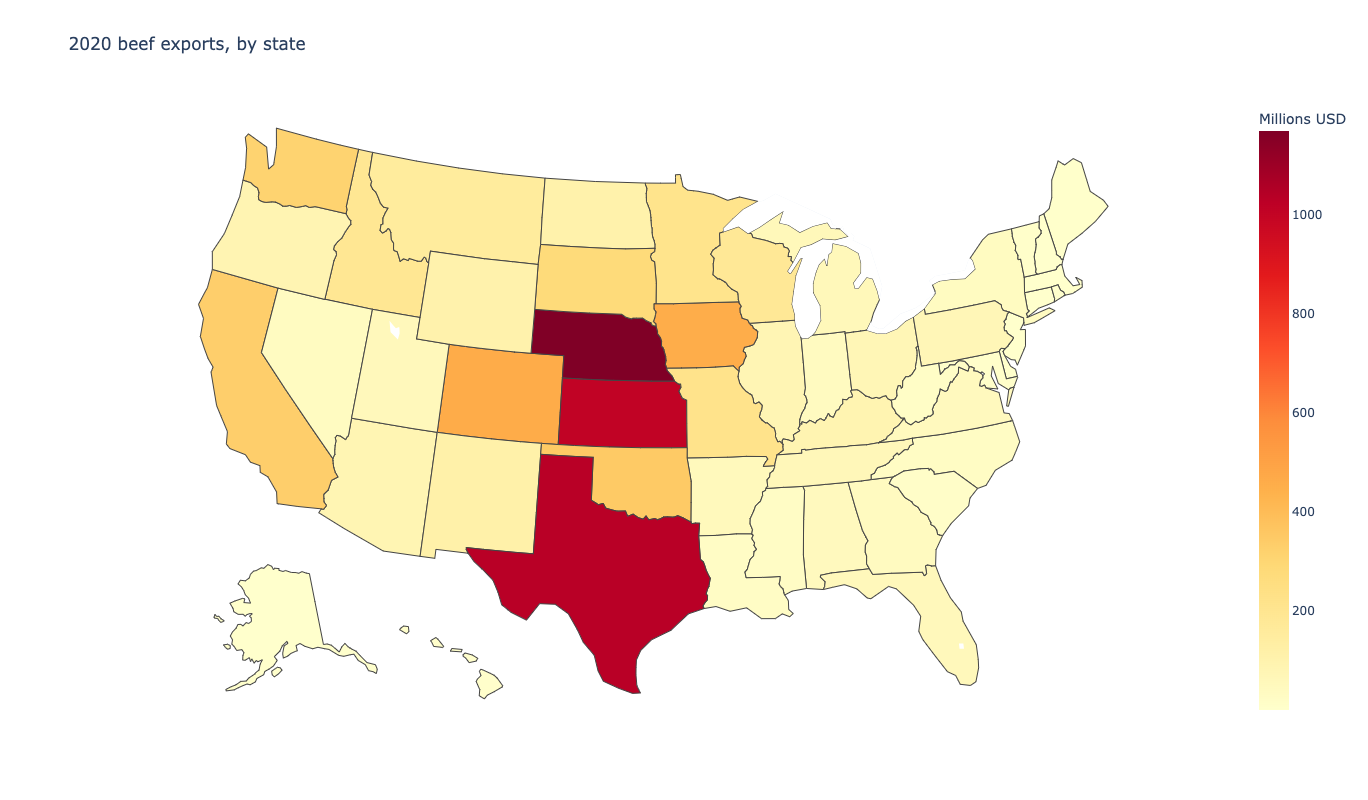

In [33]:
fig=make_figure('beef')
fig